In [1]:
import pandas as pd # read data from a CSV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn import datasets, ensemble
from sklearn.linear_model import LinearRegression
import math
import numpy as np

from sklearn import datasets, ensemble
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.inspection import permutation_importance # shuffling_idx  X_permuted

In [2]:
data=pd.read_csv(r"../data_prep/prism_df_summer_13311000.csv")  #12413370,13266000, 13311000



print(data)
print(data.columns)



      Unnamed: 0        Date  ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
0             34  2012-06-01      0.00               0.8                9.3   
1             35  2012-06-02      0.68               1.8               11.9   
2             36  2012-06-03      3.33               3.1               10.7   
3             37  2012-06-04      0.00               3.7               11.4   
4             38  2012-06-05      0.88               1.9               13.3   
...          ...         ...       ...               ...                ...   
1004        2473  2023-08-27      2.48               6.5               15.5   
1005        2474  2023-08-28      0.00               8.2               16.7   
1006        2475  2023-08-29      0.00               7.1               16.9   
1007        2476  2023-08-30      2.63               6.2               15.7   
1008        2477  2023-08-31      0.00               2.7                9.0   

      tmax..degrees.C.  tdmean..degrees.C.  vpdmin.

In [3]:
data[[ 'tmax..degrees.C.','X_00010_00001']].corr()

,tmax..degrees.C.,X_00010_00001
tmax..degrees.C.,1.000000,0.764738
X_00010_00001,0.764738,1.000000


                    ppt..mm.  tmin..degrees.C.  tmean..degrees.C.  \
ppt..mm.            1.000000         -0.108605          -0.347274   
tmin..degrees.C.   -0.108605          1.000000           0.887395   
tmean..degrees.C.  -0.347274          0.887395           1.000000   
tmax..degrees.C.   -0.457631          0.715709           0.956762   
tdmean..degrees.C.  0.262891          0.580007           0.333486   
vpdmin..hPa.       -0.364858          0.575654           0.715228   
vpdmax..hPa.       -0.466807          0.607339           0.885349   
X_00010_00001      -0.365347          0.636145           0.768396   
X_00010_00003      -0.308810          0.765849           0.859283   
X_00060_00003       0.222514         -0.488731          -0.522429   
doy                -0.143150          0.465711           0.492152   

                    tmax..degrees.C.  tdmean..degrees.C.  vpdmin..hPa.  \
ppt..mm.                   -0.457631            0.262891     -0.364858   
tmin..degrees.C.       

<Axes: >

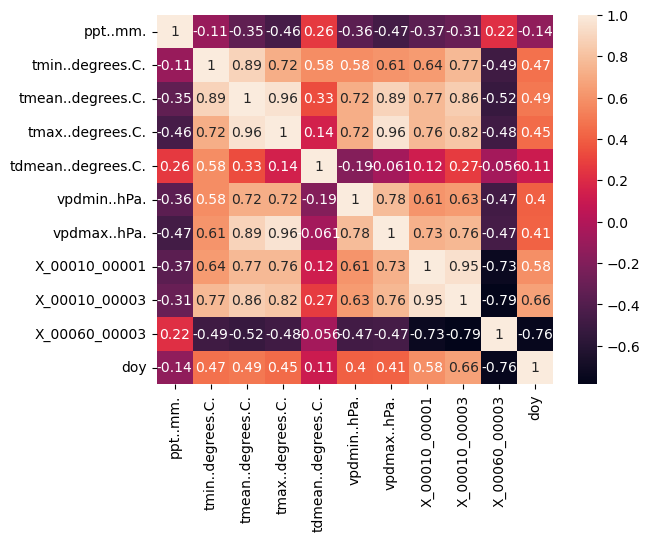

In [4]:
all_idv=[ 'ppt..mm.' 
     , 'tmin..degrees.C.'
     ,'tmean..degrees.C.'
     , 'tmax..degrees.C.', 'tdmean..degrees.C.',
      'vpdmin..hPa.', 
     'vpdmax..hPa.', 
        'X_00010_00001', # dep
  'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
     ,'doy' ]
corr_matrix= data[ all_idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

                   ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003
ppt..mm.           1.000000          -0.347274     -0.466807       0.222514
tmean..degrees.C. -0.347274           1.000000      0.885349      -0.522429
vpdmax..hPa.      -0.466807           0.885349      1.000000      -0.465559
X_00060_00003      0.222514          -0.522429     -0.465559       1.000000


<Axes: >

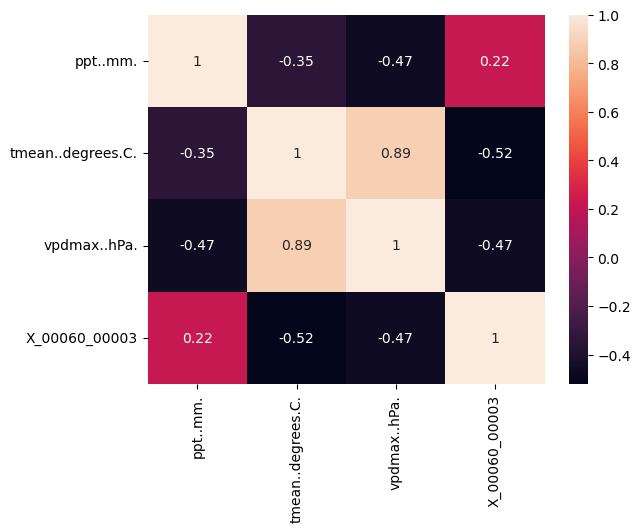

In [63]:
idv=[ 'ppt..mm.' 
     #, 'tmin..degrees.C.'
     ,'tmean..degrees.C.',
    # , 'tmax..degrees.C.', 'tdmean..degrees.C.',
     # ,'vpdmin..hPa.', 
     'vpdmax..hPa.', 
#        'X_00010_00001', # dep
 # 'X_00010_00003',  # dep
       'X_00060_00003' #,   'yr', 'mo',
    # ,'doy'
    ]
corr_matrix= data[ idv].corr()
print( corr_matrix )
sns.heatmap(corr_matrix, annot=True)

In [64]:
#input=  data[  idv].to_numpy()
input=  data[  idv]

X_train, X_test, y_train, y_test = train_test_split( input,  data['X_00010_00003'], test_size=0.2, random_state=42)

print(X_train)
print(y_train)

     ppt..mm.  tmean..degrees.C.  vpdmax..hPa.  X_00060_00003
29       0.00               13.2         20.76           57.1
280      0.00               15.1         27.81          119.0
507      0.00               17.8         33.16           21.8
706      0.00               19.1         37.54           17.2
877      0.00               15.8         25.84           24.3
..        ...                ...           ...            ...
106      0.05                6.0         11.22           60.8
270      1.46                9.4         11.45           14.0
860      0.00               13.1         18.40           53.5
435      0.00               15.6         23.55           20.9
102      0.00               15.1         26.57           82.6

[807 rows x 4 columns]
29      9.2
280     8.2
507    10.9
706    11.9
877    10.2
       ... 
106     7.1
270     8.7
860     9.1
435    10.6
102     8.6
Name: X_00010_00003, Length: 807, dtype: float64


In [65]:
print(idv)
idv2=idv +  ['yr' ]
print(idv2)
idv3=idv2 +  [  'X_00010_00003']
input=  data[  idv2]
#input
X=input[idv2]
X_train=X[X['yr']<2021]
#print(X_train)
X_test=X[X['yr']>=2021]

input2=  data[  idv3]
Y=input2[idv3]
y_train=Y[Y['yr']<2021][  'X_00010_00003']
print(y_train)

y_test=Y[Y['yr']>=2021][  'X_00010_00003']


['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003']
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003', 'yr']
0       5.9
1       5.4
2       5.4
3       6.1
4       3.9
       ... 
730    10.3
731    10.0
732     9.7
733     8.8
734     7.2
Name: X_00010_00003, Length: 735, dtype: float64


0.9476635845790513


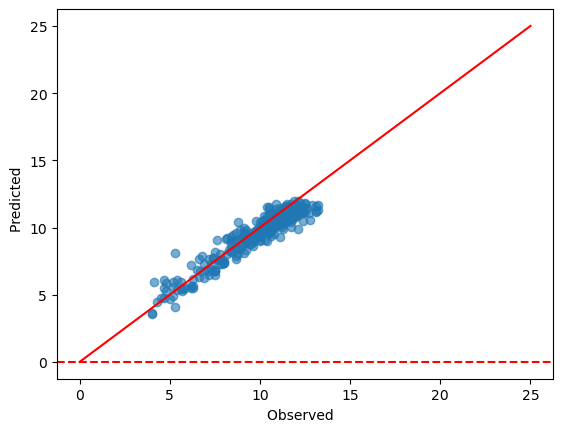

test: 0.9456926847143311
0.6064652705935158


In [66]:
linear_regr = LinearRegression()
linear_regr.fit(  X_train,  y_train )

train_fit= linear_regr.predict(X_train)

train_acc=    np.corrcoef(y_train , train_fit)[0, 1]    

print(train_acc)
yfit = linear_regr.predict(X_test)

plt.scatter( y_test , yfit , alpha=0.6)
plt.axhline(y=0, color='red', linestyle='dashed')
plt.xlabel("Observed  ")
plt.ylabel("Predicted  ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]

print("test:",correlation_coefficient)
print( mean_absolute_error( y_test , yfit))

In [67]:
max_depths=[1,2,3,4,5,6,7,8,9]

for max_depth in max_depths:
    print("max depth:",max_depth)
    regr = DecisionTreeRegressor( random_state=42 ,max_depth=  max_depth )
    regr.fit(  X_train,  y_train )
    train_fit=regr.predict(X_train)
    yfit = regr.predict(X_test)
    correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
    rms = mean_squared_error(y_test, yfit, squared=False)
    # Print the correlation coefficient
    print("test correlation_coefficient:", np.corrcoef(y_train , train_fit)[0, 1] )
    print("test correlation_coefficient:",correlation_coefficient)
    print("MSE:", mean_absolute_error( y_test , yfit ) )
    print("RMS:",rms)

max depth: 1
test correlation_coefficient: 0.7981489680559424
test correlation_coefficient: 0.8231094337270309
MSE: 1.0425489279337616
RMS: 1.27259296930169
max depth: 2
test correlation_coefficient: 0.8918531273081626
test correlation_coefficient: 0.8896562333047221
MSE: 0.826004948330691
RMS: 1.032014128896111
max depth: 3
test correlation_coefficient: 0.9286554586655551
test correlation_coefficient: 0.9107221328814684
MSE: 0.7326656081730687
RMS: 0.9301876892669502
max depth: 4
test correlation_coefficient: 0.9510492767940041
test correlation_coefficient: 0.905417564389658
MSE: 0.7637437160779367
RMS: 0.9824877339938491
max depth: 5
test correlation_coefficient: 0.9631943364148772
test correlation_coefficient: 0.9180008352680752
MSE: 0.7105678273257298
RMS: 0.9356378474772573
max depth: 6
test correlation_coefficient: 0.97212260768774
test correlation_coefficient: 0.9147534033483866
MSE: 0.7399747660148059
RMS: 0.9658258264158213
max depth: 7
test correlation_coefficient: 0.97928322

max depth: 5
correlation_coefficient: 0.9180008352680752
MSE: 0.7105678273257298
RMS: 0.9356378474772573


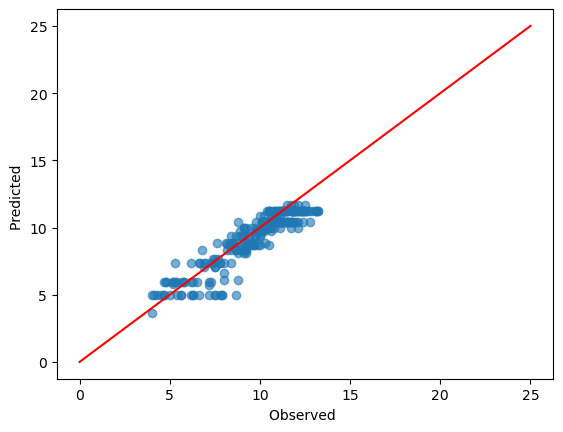

In [68]:
print("max depth:", 5)
regr = DecisionTreeRegressor( random_state=42 ,max_depth=  5)
regr.fit(  X_train,  y_train )
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)
correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

In [69]:
print(regr.feature_importances_)
print(idv)

[0.01928843 0.22420135 0.00608668 0.74793653 0.00248702]
['ppt..mm.', 'tmean..degrees.C.', 'vpdmax..hPa.', 'X_00060_00003']


In [70]:
params = {
    "n_estimators": 250,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

In [71]:
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)

mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 0.7191


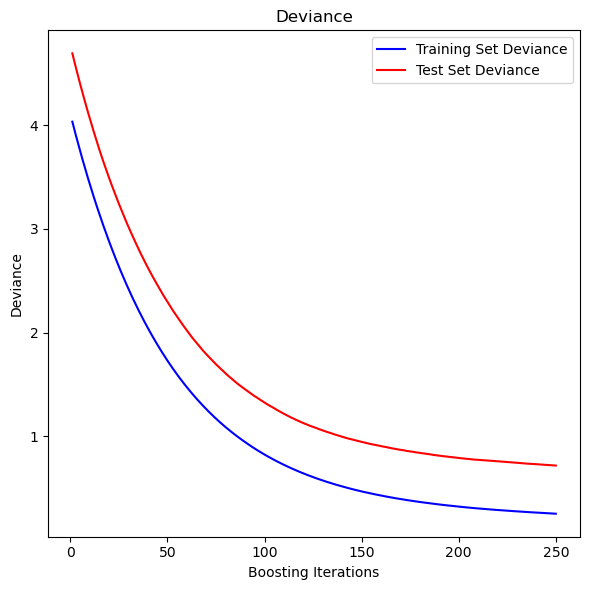

In [72]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test)):
    test_score[i] = mean_squared_error(y_test, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

IndexError: index 4 is out of bounds for axis 0 with size 4

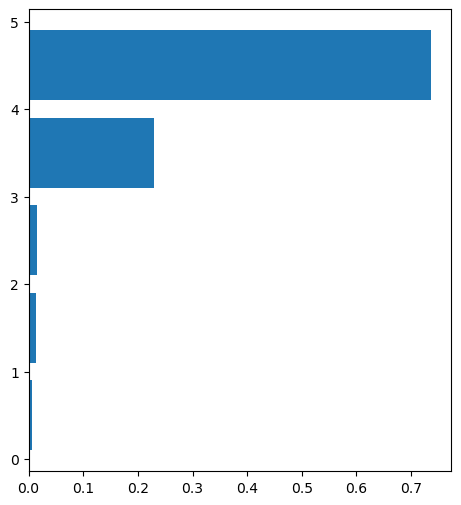

In [73]:
# Careful, impurity-based feature importances can be misleading for high cardinality features (many unique values). 
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(idv)[sorted_idx])
plt.title("Feature Importance  ")

result = permutation_importance(
    reg, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array( idv)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

In [74]:
#from sklearn.datasets import load_breast_cancer
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split

#X, y = load_breast_cancer(return_X_y=True, as_frame=True)
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

#clf = RandomForestClassifier(n_estimators=100, random_state=42)
#clf.fit(X_train, y_train)
#print(f"Baseline accuracy on test data: {clf.score(X_test, y_test):.2}")

#X_train

In [75]:
from sklearn.inspection import permutation_importance


def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T, # importances : Raw permutation importance scores.
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

The plot on the left shows the Gini importance of the model. 

permuting a feature

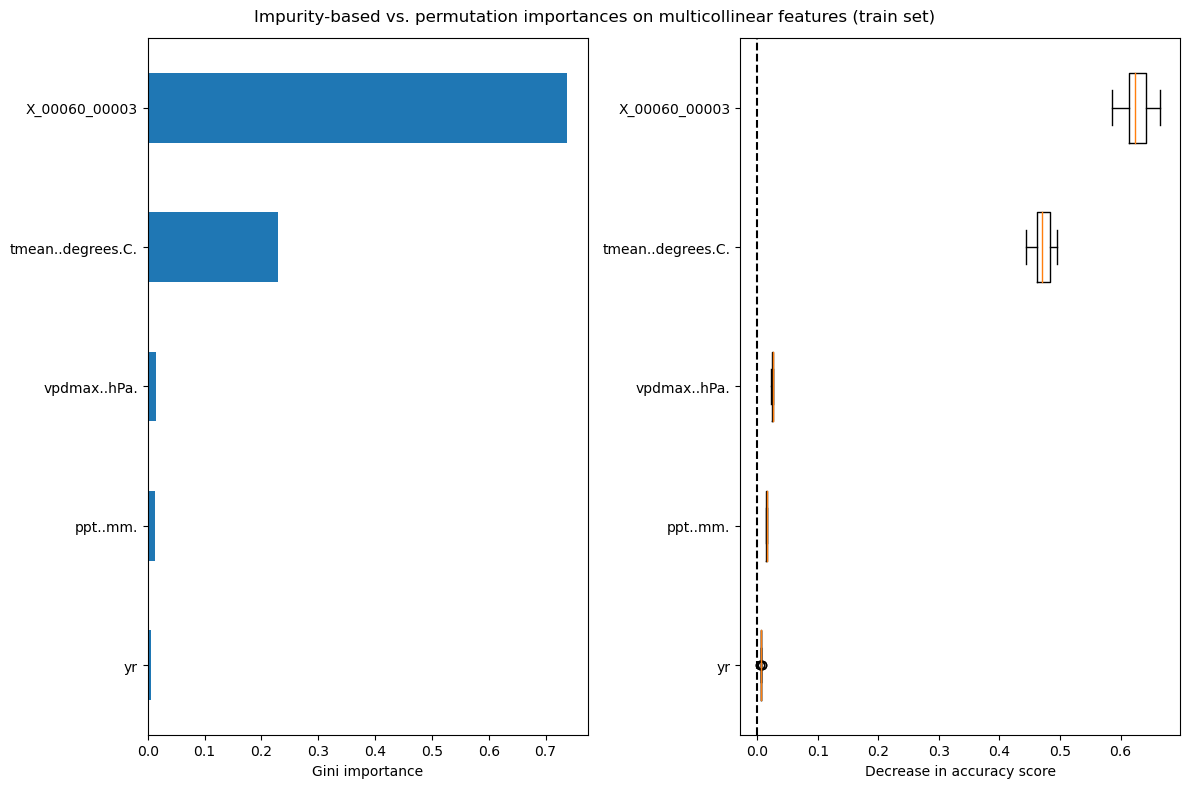

In [76]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mdi_importances = pd.Series(reg.feature_importances_, index=X_train.columns)
tree_importance_sorted_idx = np.argsort(reg.feature_importances_)
tree_indices = np.arange(0, len(reg.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
mdi_importances.sort_values().plot.barh(ax=ax1)
ax1.set_xlabel("Gini importance")
plot_permutation_importance(reg, X_train, y_train, ax2)
ax2.set_xlabel("Decrease in accuracy score")
fig.suptitle(
    "Impurity-based vs. permutation importances on multicollinear features (train set)"
)
_ = fig.tight_layout()

correlation_coefficient: 0.9419028312481162
MSE: 0.66571094542157
RMS: 0.8480652383522197


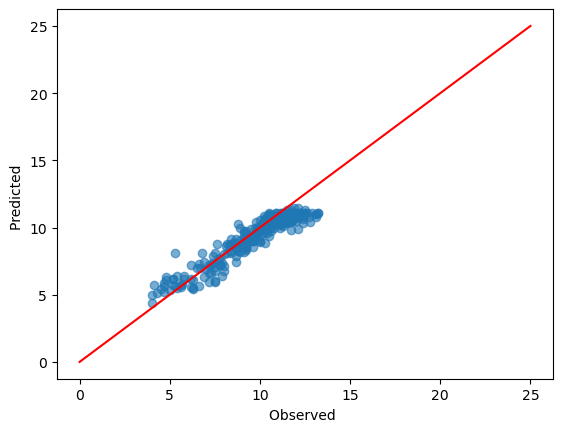

In [77]:
#regr = DecisionTreeRegressor( random_state=42 ,max_depth=  6)
#regr.fit(  X_train,  y_train )
#train_fit=regr.predict(X_train)
#yfit = regr.predict(X_test)

regr = ensemble.GradientBoostingRegressor(**params)
regr.fit(X_train, y_train)
train_fit=regr.predict(X_train)
yfit = regr.predict(X_test)

correlation_coefficient = np.corrcoef(y_test , yfit)[0, 1]
rms = mean_squared_error(y_test, yfit, squared=False)
# Print the correlation coefficient
print("correlation_coefficient:",correlation_coefficient)
print("MSE:", mean_absolute_error( y_test , yfit ) )
print("RMS:",rms)

yfit = regr.predict(X_test)
# Plot the estimated linear regression line with matplotlib:
plt.scatter( y_test , yfit , alpha=0.6)
# Set the x-axis label
plt.xlabel("Observed ")
plt.ylabel("Predicted ")

x = np.linspace(0, 25, 25)
y = x
plt.plot(x, y, color='red')

plt.show()

(array([ 2., 16., 15., 11., 12., 19., 27., 30., 75., 67.]),
 array([ 4.37629789,  5.08606501,  5.79583214,  6.50559927,  7.2153664 ,
         7.92513353,  8.63490066,  9.34466778, 10.05443491, 10.76420204,
        11.47396917]),
 <BarContainer object of 10 artists>)

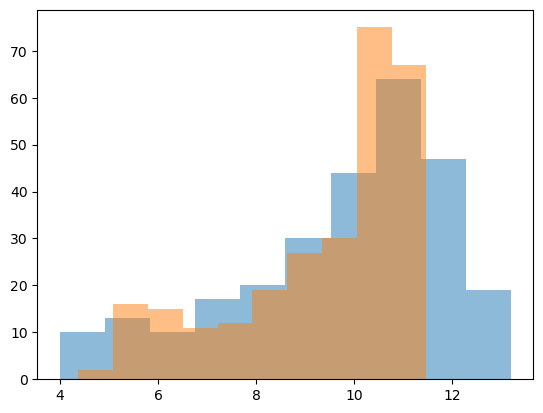

In [78]:
plt.hist(y_test , alpha=0.5)
plt.hist(yfit , alpha=0.5)